In [1]:
import os
import opyplus as op
import warnings
warnings.filterwarnings("ignore")

eplus_dir_path = op.get_eplus_base_dir_path((9, 2, 0))

In [2]:
# idf path
idf_path = os.path.join(
    eplus_dir_path,
    "ExampleFiles",
    "DOEE-EnergyPlus V0.1.2(NORTHKashan).idf"
)

# epw path
epw_path = os.path.join(
    eplus_dir_path,
    "WeatherData",
    "IRN_ES_Kashan.AP.407850_TMYx.2004-2018.epw"
)

base_dir_path = os.path.join(
    eplus_dir_path,
    "Result","Tehran(NORTH)"
) 
# run simulation
s = op.simulate(
    idf_path,
    epw_path,
    base_dir_path,
    simulation_name=None,
    print_function=None,
    beat_freq=None,
)

called Simulation.from_input on a simulation directory that is not empty (C:\\EnergyPlusV9-2-0\Result\Tehran(NORTH))


In [3]:
print(f"status: {s.get_status()}\n")
print(f"Eplus .err file:\n{s.get_out_err().get_content()}")

status: finished

Eplus .err file:
Program Version,EnergyPlus, Version 9.2.0-921312fa1d, YMD=2022.02.05 06:36,
   ** Warning ** ProcessScheduleInput: Schedule:Day:Interval="SCHEDULE DAY 1", , One or more values are not integer as required by Schedule Type Limits Name=ONOFF
   ** Warning ** ProcessScheduleInput: Schedule:Constant="ALWAYS OFF DISCRETE", Blank Schedule Type Limits Name input -- will not be validated.
   ** Warning ** ProcessScheduleInput: Schedule:Constant="ALWAYS ON CONTINUOUS", Blank Schedule Type Limits Name input -- will not be validated.
   ************* Beginning Zone Sizing Calculations
   ** Warning ** Weather file location will be used rather than entered (IDF) Location object.
   **   ~~~   ** ..Location object=TEHRAN MEHRABAD
   **   ~~~   ** ..Weather File Location=Kashan AP ES IRN ISD-TMYx WMO#=407850
   **   ~~~   ** ..due to location differences, Latitude difference=[1.51] degrees, Longitude difference=[0.39] degrees.
   **   ~~~   ** ..Time Zone difference

In [4]:
# retrieve hourly output (.eso file)
hourly_output = s.get_out_eso()

# ask for datetime index on year 2013
hourly_output.create_datetime_index(2018)

# get Pandas dataframe
df = hourly_output.get_data()

# monthly resample and display
#print(df[[
#    "environment,Site Outdoor Air Drybulb Temperature",
#    "main zone,Zone Mean Air Temperature"
#]].resample("MS").mean())
df

,month,day,hour,minute,end_minute,dst,day_type,"thermal zone: amphitheater,Zone Air Temperature","thermal zone: conferance,Zone Air Temperature","thermal zone: corridor1,Zone Air Temperature",...,"ahu lab,Air System Outdoor Air Flow Fraction","ahu library,Air System Outdoor Air Flow Fraction","ahu north-gf,Air System Outdoor Air Flow Fraction","ahu north1-2,Air System Outdoor Air Flow Fraction","ahu north3,Air System Outdoor Air Flow Fraction","ahu south-gf,Air System Outdoor Air Flow Fraction","ahu south1-2,Air System Outdoor Air Flow Fraction","ahu south3,Air System Outdoor Air Flow Fraction","electricity:facility,Meter","gas:facility,Meter"
2018-01-01 00:00:00,1,1,0,0,10,0,Sunday,22.009118,21.994303,21.999955,...,0.063,0.063,0.063,0.063,0.063,0.063,0.063,0.063,1.624800e+07,2.598222e+08
2018-01-01 00:10:00,1,1,0,10,20,0,Sunday,21.998626,22.001707,21.999965,...,0.063,0.063,0.063,0.063,0.063,0.063,0.063,0.063,1.632310e+07,2.612091e+08
2018-01-01 00:20:00,1,1,0,20,30,0,Sunday,22.005868,21.990099,21.999974,...,0.063,0.063,0.063,0.063,0.063,0.063,0.063,0.063,1.640271e+07,2.627032e+08
2018-01-01 00:30:00,1,1,0,30,40,0,Sunday,21.994879,21.997344,21.999982,...,0.063,0.063,0.063,0.063,0.063,0.063,0.063,0.063,1.648559e+07,2.638957e+08
2018-01-01 00:40:00,1,1,0,40,50,0,Sunday,22.001755,22.005815,22.000225,...,0.063,0.063,0.063,0.063,0.063,0.063,0.063,0.063,1.656303e+07,2.651056e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:10:00,12,31,23,10,20,0,Sunday,22.009528,22.005277,21.999961,...,0.063,0.063,0.063,0.063,0.063,0.063,0.063,0.063,1.716264e+07,2.740054e+08
2018-12-31 23:20:00,12,31,23,20,30,0,Sunday,22.011562,22.006440,21.999960,...,0.063,0.063,0.063,0.063,0.063,0.063,0.063,0.063,1.718696e+07,2.742848e+08
2018-12-31 23:30:00,12,31,23,30,40,0,Sunday,22.013397,22.007431,21.999960,...,0.063,0.063,0.063,0.063,0.063,0.063,0.063,0.063,1.720901e+07,2.746403e+08
2018-12-31 23:40:00,12,31,23,40,50,0,Sunday,22.015151,22.008354,21.999962,...,0.063,0.063,0.063,0.063,0.063,0.063,0.063,0.063,1.723180e+07,2.749740e+08


In [5]:
import pandas as pd
df=pd.DataFrame(data=df)
import pandas as pd
df2=df[['month','electricity:facility,Meter','gas:facility,Meter']]
df2

,month,"electricity:facility,Meter","gas:facility,Meter"
2018-01-01 00:00:00,1,1.624800e+07,2.598222e+08
2018-01-01 00:10:00,1,1.632310e+07,2.612091e+08
2018-01-01 00:20:00,1,1.640271e+07,2.627032e+08
2018-01-01 00:30:00,1,1.648559e+07,2.638957e+08
2018-01-01 00:40:00,1,1.656303e+07,2.651056e+08
...,...,...,...
2018-12-31 23:10:00,12,1.716264e+07,2.740054e+08
2018-12-31 23:20:00,12,1.718696e+07,2.742848e+08
2018-12-31 23:30:00,12,1.720901e+07,2.746403e+08
2018-12-31 23:40:00,12,1.723180e+07,2.749740e+08


In [6]:
df3=df2.groupby('month').sum()
df3

,"electricity:facility,Meter","gas:facility,Meter"
month,,
1,1.423530e+11,6.047979e+11
2,1.246628e+11,3.934062e+11
3,1.334650e+11,1.452341e+11
4,1.128683e+11,0.000000e+00
5,1.972820e+11,0.000000e+00
6,2.144885e+11,0.000000e+00
7,2.207037e+11,0.000000e+00
8,2.226829e+11,0.000000e+00
9,1.955644e+11,0.000000e+00


<AxesSubplot:xlabel='month'>

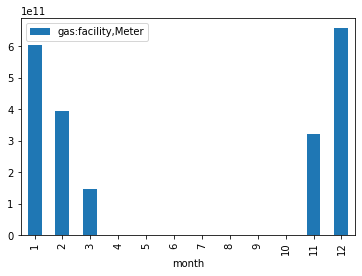

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


%matplotlib inline
#When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code.

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df3.plot.bar(x=None,y='gas:facility,Meter')